<a href="https://colab.research.google.com/github/ranjan717/Machine_learning_Projects/blob/main/Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Salary Prediction

In [80]:
while True:
  try:
    exp = float(input("Enter years of experience (must be > 0): "))
    if exp > 0:
      break
    else:
      print("Years of experience must be greater than 0.")
  except ValueError:
    print("Invalid input. Please enter a numerical value.")

# Assuming 'model_1' is your trained linear regression model from the previous code
predicted_salary = model_1.predict([[exp]])
print(f"Predicted salary for {exp} years of experience: {predicted_salary[0]}")


Enter years of experience (must be > 0): -1
Years of experience must be greater than 0.
Enter years of experience (must be > 0): 1
Predicted salary for 1.0 years of experience: 18683.96074301191


# Import Libraries and Read the Data

In [73]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

Read the dataframe

In [56]:
df=pd.read_excel('/content/Salary.xlsx')
df.head()

,YearsExperience,Salary
0,1.1,10000
1,1.3,10500
2,1.5,11000
3,2.0,11500
4,2.2,12000


# Check for Conditions of LR

Check linearity

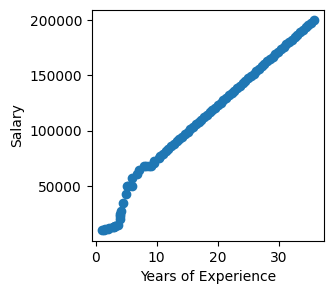

In [57]:
import matplotlib.pyplot as plt
# Check linearity
plt.figure(figsize=(3,3))
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()


Check Multicollinearity

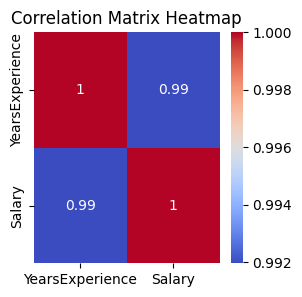

In [58]:
import matplotlib.pyplot as plt
# Check Multicollinearity
import seaborn as sns
corr_matrix = df.corr()
plt.figure(figsize=(3,3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

Check Normality of residuals

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     5168.
Date:                Thu, 15 May 2025   Prob (F-statistic):           3.22e-77
Time:                        06:18:00   Log-Likelihood:                -886.49
No. Observations:                  86   AIC:                             1777.
Df Residuals:                      84   BIC:                             1782.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.271e+04   1505.566     

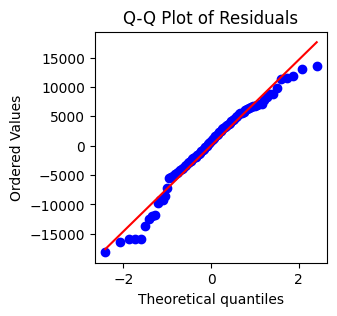

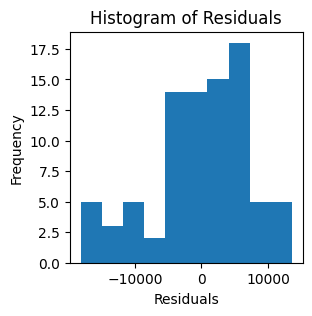

In [59]:
X = df['YearsExperience']
y = df['Salary']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

# Get the residuals
residuals = est2.resid

# Create a Q-Q plot
plt.figure(figsize=(3,3))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# Create a histogram of residuals
plt.figure(figsize=(3,3))
plt.hist(residuals, bins=10)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Check Outlier

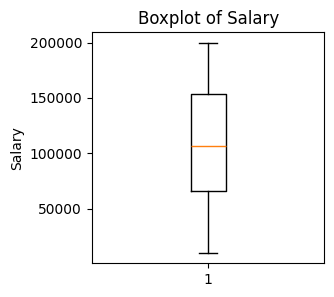

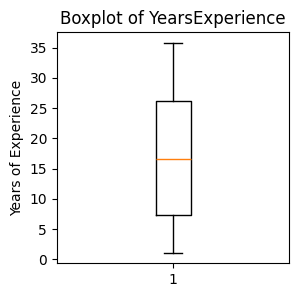

Salary Outliers:
Empty DataFrame
Columns: [YearsExperience, Salary]
Index: []

Years of Experience Outliers:


,YearsExperience,Salary


In [60]:
import matplotlib.pyplot as plt
# Check Outlier
plt.figure(figsize=(3,3))
plt.boxplot(df['Salary'])
plt.title("Boxplot of Salary")
plt.ylabel("Salary")
plt.show()

plt.figure(figsize=(3,3))
plt.boxplot(df['YearsExperience'])
plt.title("Boxplot of YearsExperience")
plt.ylabel("Years of Experience")
plt.show()

# Calculate IQR for Salary
Q1_salary = df['Salary'].quantile(0.25)
Q3_salary = df['Salary'].quantile(0.75)
IQR_salary = Q3_salary - Q1_salary
lower_bound_salary = Q1_salary - 1.5 * IQR_salary
upper_bound_salary = Q3_salary + 1.5 * IQR_salary

# Identify outliers for Salary
salary_outliers = df[(df['Salary'] < lower_bound_salary) | (df['Salary'] > upper_bound_salary)]
print("Salary Outliers:")
print(salary_outliers)

# Calculate IQR for YearsExperience
Q1_exp = df['YearsExperience'].quantile(0.25)
Q3_exp = df['YearsExperience'].quantile(0.75)
IQR_exp = Q3_exp - Q1_exp
lower_bound_exp = Q1_exp - 1.5 * IQR_exp
upper_bound_exp = Q3_exp + 1.5 * IQR_exp

# Identify outliers for YearsExperience
exp_outliers = df[(df['YearsExperience'] < lower_bound_exp) | (df['YearsExperience'] > upper_bound_exp)]

print("\nYears of Experience Outliers:")
exp_outliers


# Perform Regression

Regrression Step-1 . Separate the independent and dependent variables into X and Y

In [62]:
x = df["YearsExperience"].values
y = df["Salary"].values

Regression Step-2 . Reshape the independent variable from 1D to 2D because sci-kit learn expects the it to be in 2D array.

In [64]:
x=x.reshape(-1,1)

Regression Step-3 .Split the data into train set and test set

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Regression Step-4 . Train the algorithm with train data

In [67]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

Regression Step-5 .Check the intercept and slope of the best fit line

In [68]:
print(model_1.intercept_)  ## Value of Y when X=0

13330.391275873102


In [69]:
print(model_1.coef_)

[5353.56946714]


Regression Step-6 .Make predictions

In [70]:
y_pred = model_1.predict(X_test)
y_pred

array([ 21360.74547658,  35280.02609114, 127807.55171486,  98898.27659231,
       178398.78317932,  72398.10772997, 108534.70163316, 103716.48911273,
       137443.97675571, 204898.95204166,  30461.81357072,  64189.30121369,
        79625.42651061, 149489.50805677,  30461.81357072,  40633.59555828,
        59906.44563998, 135034.8704955 ])

Regression Step-7 . Compare the actual vs Predicted dependent values

In [71]:
r = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
r

,Actual,Predicted
0,11000,21360.745477
1,27500,35280.026091
2,129710,127807.551715
3,103406,98898.276592
4,175742,178398.783179
5,79294,72398.107730
6,112174,108534.701633
7,107790,103716.489113
8,138478,137443.976756
9,199854,204898.952042


Regression Step-8 .Check the performance of the model

In [74]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  #average of absolute errors
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R square:', r2_score(y_test, y_pred))

Mean Absolute Error: 6277.6055016728615
Mean Squared Error: 61163741.465803474
Root Mean Squared Error: 7820.725124040831
R square: 0.9796911035457284


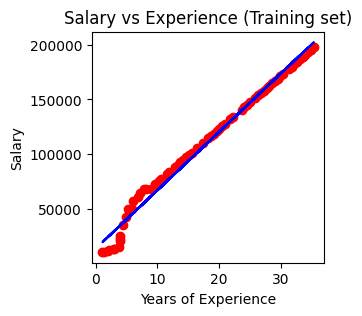

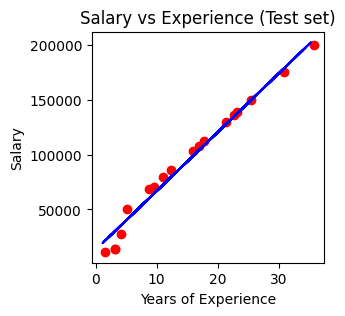

In [75]:
import matplotlib.pyplot as plt
# Regression Step-9. Visualize the best fit line
plt.figure(figsize=(3,3))
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, model_1.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Regression Step-10. Visualize the test data
plt.figure(figsize=(3,3))
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, model_1.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


# Conclusion

* The regression line fits the data reasonably well in both the training and test sets.
* The R-squared value is high, indicating a good fit of the model.
* The performance metrics (MAE, MSE, RMSE) also indicate that the model is performing well.
Overall:

* The charts and associated analysis provide evidence that a linear regression model is appropriate for predicting salary based on years of experience.

* The assumptions of linearity, normality of residuals, and no significant multicollinearity are reasonably met.

The model demonstrates good performance on the data.